In [90]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import numpy as np
import pandas as pd

import os
import chardet

In [2]:
import matplotlib

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# df = pd.read_csv('/content/drive/MyDrive/data/final.csv', encoding='Windows-1252')
df = pd.read_csv('/content/drive/MyDrive/data/final.csv')

In [7]:
pd.set_option('display.float_format', None) # 과학적 표기법 x

# **1. EDA**

In [8]:
df.head()

,Unnamed: 0,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,0,군위,2021-09-01,61.1076,2902435.2,2394057.6,38444000.0,78.9,40100000.0,90.8,21.9,2.4,0.2
1,1,군위,2021-09-02,0.2366,1394668.8,4237228.8,35601000.0,73.1,40100000.0,77.1,21.8,2.5,0.9
2,2,군위,2021-09-03,0.0000,207532.8,2620512.0,33188000.0,68.2,40100000.0,86.5,20.5,1.4,0.7
3,3,군위,2021-09-04,0.0000,229478.4,121564.8,33296000.0,68.4,40100000.0,66.4,22.4,2.0,7.7
4,4,군위,2021-09-05,0.0000,128908.8,128908.8,33296000.0,68.4,40100000.0,68.5,21.8,1.7,1.0


In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df #필요없는 칼럼 'Unnamed: 0' 삭제

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,군위,2021-09-01,61.1076,2902435.2,2394057.6,38444000.0,78.9,40100000.0,90.8,21.9,2.4,0.2
1,군위,2021-09-02,0.2366,1394668.8,4237228.8,35601000.0,73.1,40100000.0,77.1,21.8,2.5,0.9
2,군위,2021-09-03,0.0000,207532.8,2620512.0,33188000.0,68.2,40100000.0,86.5,20.5,1.4,0.7
3,군위,2021-09-04,0.0000,229478.4,121564.8,33296000.0,68.4,40100000.0,66.4,22.4,2.0,7.7
4,군위,2021-09-05,0.0000,128908.8,128908.8,33296000.0,68.4,40100000.0,68.5,21.8,1.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30676,횡성,2020-08-27,7.2651,557107.2,1364342.4,64670000.0,74.4,73400000.0,80.8,27.4,2.0,3.6
30677,횡성,2020-08-28,59.3119,733104.0,380764.8,65022000.0,74.8,73400000.0,85.9,27.0,1.1,3.7
30678,횡성,2020-08-29,24.2231,3824755.2,1530144.0,67317000.0,77.5,73400000.0,88.4,25.8,0.6,1.3
30679,횡성,2020-08-30,39.7127,3964377.6,2511561.6,68770000.0,79.1,73400000.0,90.3,25.1,0.8,1.7


In [11]:
df.sort_values(by = ['dam_nm', 'obsr_de'], inplace=True, ignore_index=True)

In [12]:
df #댐 이름과 날짜 순서대로 정렬

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,군위,2019-01-01,0.0,0.0,95990.4,28127000.0,57.80,40100000.0,48.0,-0.7,3.8,5.2
1,군위,2019-01-02,0.0,24278.4,84585.6,28066000.0,57.60,40100000.0,39.5,-0.5,2.7,7.0
2,군위,2019-01-03,0.0,15984.0,76291.2,28006000.0,57.50,40100000.0,30.7,0.0,2.2,7.1
3,군위,2019-01-04,0.0,0.0,76377.6,27926000.0,57.30,40100000.0,37.8,0.5,1.8,5.4
4,군위,2019-01-05,0.0,0.0,78105.6,27845000.0,57.20,40100000.0,39.6,2.4,2.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
30676,횡성,2022-12-27,0.0,47606.4,200707.2,66188900.0,76.17,73400000.0,72.6,-7.1,0.4,5.7
30677,횡성,2022-12-28,0.0,50371.2,203299.2,66036000.0,75.99,73400000.0,61.3,-5.3,1.3,5.8
30678,횡성,2022-12-29,0.0,50112.0,202780.8,65883400.0,75.82,73400000.0,60.9,-6.2,0.6,5.5
30679,횡성,2022-12-30,0.0,52358.4,204854.4,65730900.0,75.64,73400000.0,71.6,-4.4,0.5,4.6


In [13]:
df.info() #결측치 사전에 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dam_nm      30681 non-null  object 
 1   obsr_de     30681 non-null  object 
 2   rain_qy     30681 non-null  float64
 3   inflow_qy   30681 non-null  float64
 4   outflow_qy  30681 non-null  float64
 5   reserve_qy  30681 non-null  float64
 6   reserve_rt  30681 non-null  float64
 7   valid_qy    30681 non-null  float64
 8   avg_hmd     30681 non-null  float64
 9   avg_tmr     30681 non-null  float64
 10  avg_wv      30681 non-null  float64
 11  sun_sum     30681 non-null  float64
dtypes: float64(10), object(2)
memory usage: 2.8+ MB


In [14]:
df.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,30681.000000,3.068100e+04,3.068100e+04,3.068100e+04,30681.000000,3.068100e+04,30681.000000,30681.000000,30681.000000,30681.000000
mean,3.542968,2.098515e+06,2.174761e+06,3.627624e+08,57.301970,4.366905e+08,68.671781,13.109908,1.567154,8.731742
std,12.517330,1.123420e+07,9.133807e+06,4.937190e+08,16.767103,5.300645e+08,15.216576,9.891448,0.979103,6.221841
min,0.000000,0.000000e+00,0.000000e+00,3.000000e+03,0.000000,1.788000e+07,0.800000,-16.000000,0.020000,0.080000
25%,0.000000,4.052160e+04,1.378944e+05,3.934500e+07,46.400000,6.980000e+07,58.400000,5.100000,0.900000,5.000000
50%,0.000000,2.485728e+05,5.885568e+05,1.351010e+08,58.400000,2.100000e+08,70.600000,13.300000,1.300000,8.200000
75%,0.491400,1.110758e+06,1.614211e+06,4.669560e+08,69.200000,5.600000e+08,80.000000,21.600000,1.900000,11.100000
max,334.630500,4.715675e+08,4.343860e+08,2.416721e+09,98.900000,1.900000e+09,100.000000,94.200000,10.000000,446.000000


In [15]:
df['obsr_de'] = pd.to_datetime(df['obsr_de'])

In [16]:
df.groupby(by=df['obsr_de'].dt.month).mean()

<ipython-input-16-9f051fa1d167>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=df['obsr_de'].dt.month).mean()


,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
obsr_de,,,,,,,,,,
1,0.959957,5.617381e+05,1.113529e+06,3.853641e+08,61.254155,4.366905e+08,61.269624,-0.169795,1.655492,6.528906
2,1.013328,5.055301e+05,1.110722e+06,3.674863e+08,58.628420,4.366905e+08,58.142183,2.010156,1.895660,9.037307
3,2.173169,9.255175e+05,1.146479e+06,3.546286e+08,56.738533,4.366905e+08,62.250960,7.759811,1.825769,10.214869
4,2.054568,1.053349e+06,1.403793e+06,3.483601e+08,55.438306,4.366905e+08,57.936587,12.349365,1.835820,10.025869
5,2.437670,1.030059e+06,1.660460e+06,3.309793e+08,52.189528,4.366905e+08,63.422465,17.720584,1.717320,11.117093
6,4.812884,1.090065e+06,1.879194e+06,3.066120e+08,47.448377,4.366905e+08,73.353337,22.229722,1.508333,10.278639
7,8.876290,5.247905e+06,3.212771e+06,3.273506e+08,51.522316,4.366905e+08,80.221006,24.883086,1.398702,8.413349
8,9.446455,7.287351e+06,7.196957e+06,3.653342e+08,57.187865,4.366905e+08,81.086521,25.662020,1.333717,7.680945
9,6.189290,4.706705e+06,3.556679e+06,3.905150e+08,61.767833,4.366905e+08,79.117421,20.859286,1.362786,8.732103


In [17]:
df['rain_qy_mean_value_by_month'] = df.groupby(pd.Grouper(key='obsr_de', freq='M'))['rain_qy'].transform('mean')

In [18]:
plt.rcParams['font.family'] = 'DejaVu Sans'

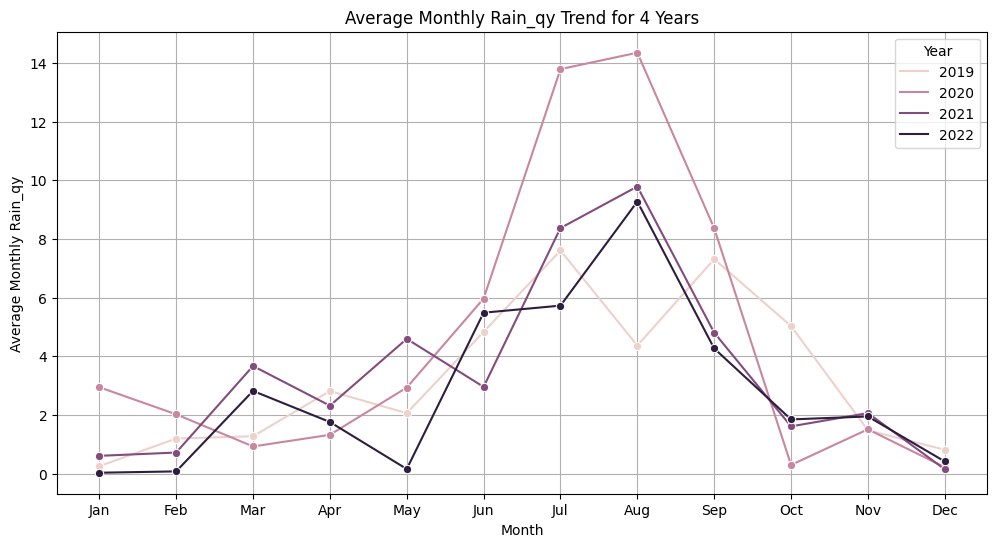

In [19]:
#연도 칼럼과 월별 칼럼 생성
df['year'] = df['obsr_de'].dt.year
df['month'] = df['obsr_de'].dt.month

#데이터를 연도별, 월별로 묶고 데이터값(여기서는 강우량)의 평균 계산
monthly_mean_rain_qy = df.groupby(['year', 'month'])['rain_qy'].mean().reset_index()

# matplotlib과 seaborn으로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_mean_rain_qy, x='month', y='rain_qy', hue='year', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Monthly Rain_qy')
plt.title('Average Monthly Rain_qy Trend for 4 Years')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

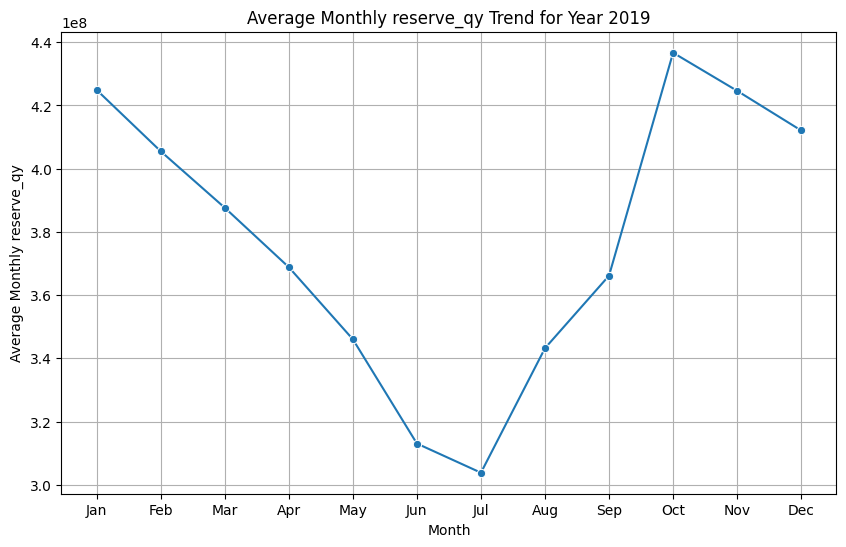

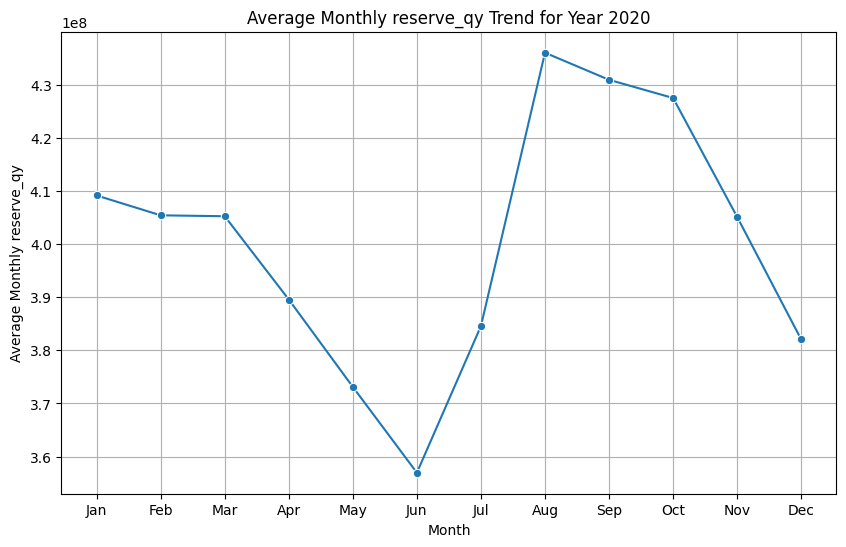

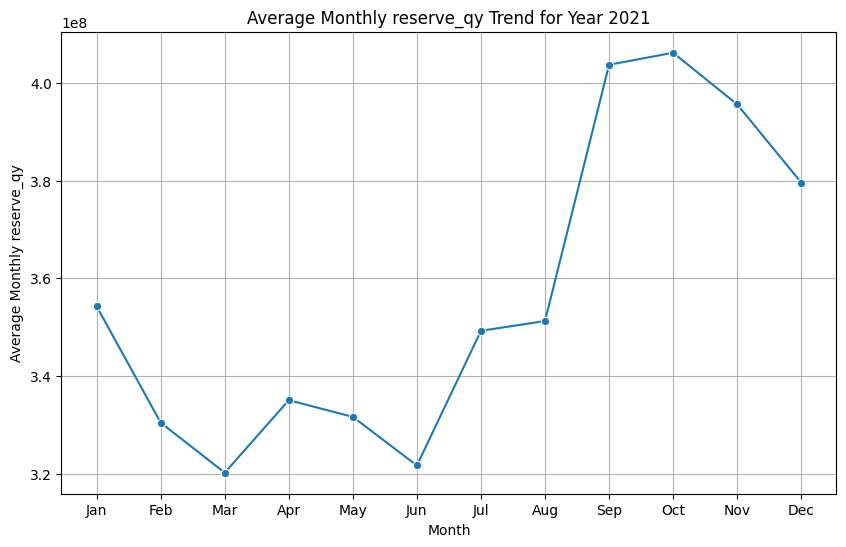

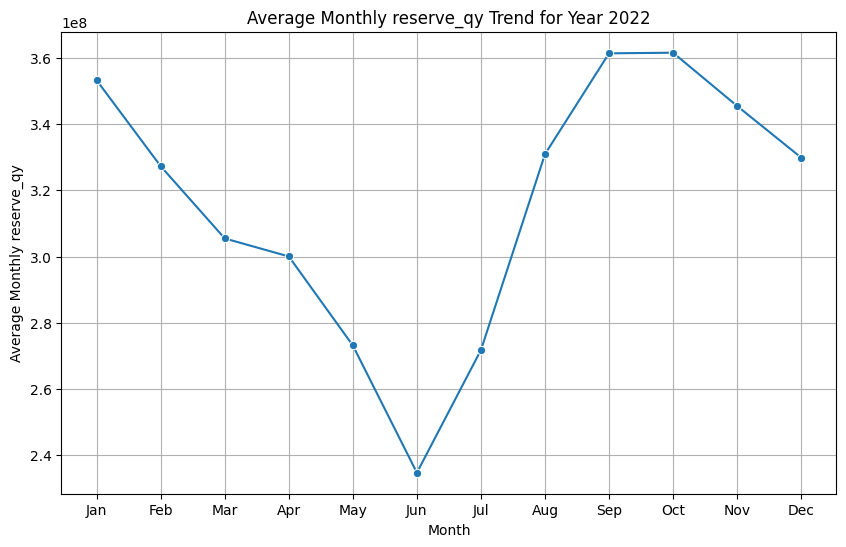

In [20]:
#2019년~2022년 동안의 총 저수량 변화
df['year'] = df['obsr_de'].dt.year
df['month'] = df['obsr_de'].dt.month

monthly_mean_reserve_qy = df.groupby(['year', 'month'])['reserve_qy'].mean().reset_index()

# Use matplotlib and seaborn to create separate graphs for each year.
years = monthly_mean_reserve_qy['year'].unique()

for year in years:
    year_data = monthly_mean_reserve_qy[monthly_mean_reserve_qy['year'] == year]

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=year_data, x='month', y='reserve_qy', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly reserve_qy')
    plt.title(f'Average Monthly reserve_qy Trend for Year {year}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-21-1e94b537656d>:22: UserWarning: Glyph 

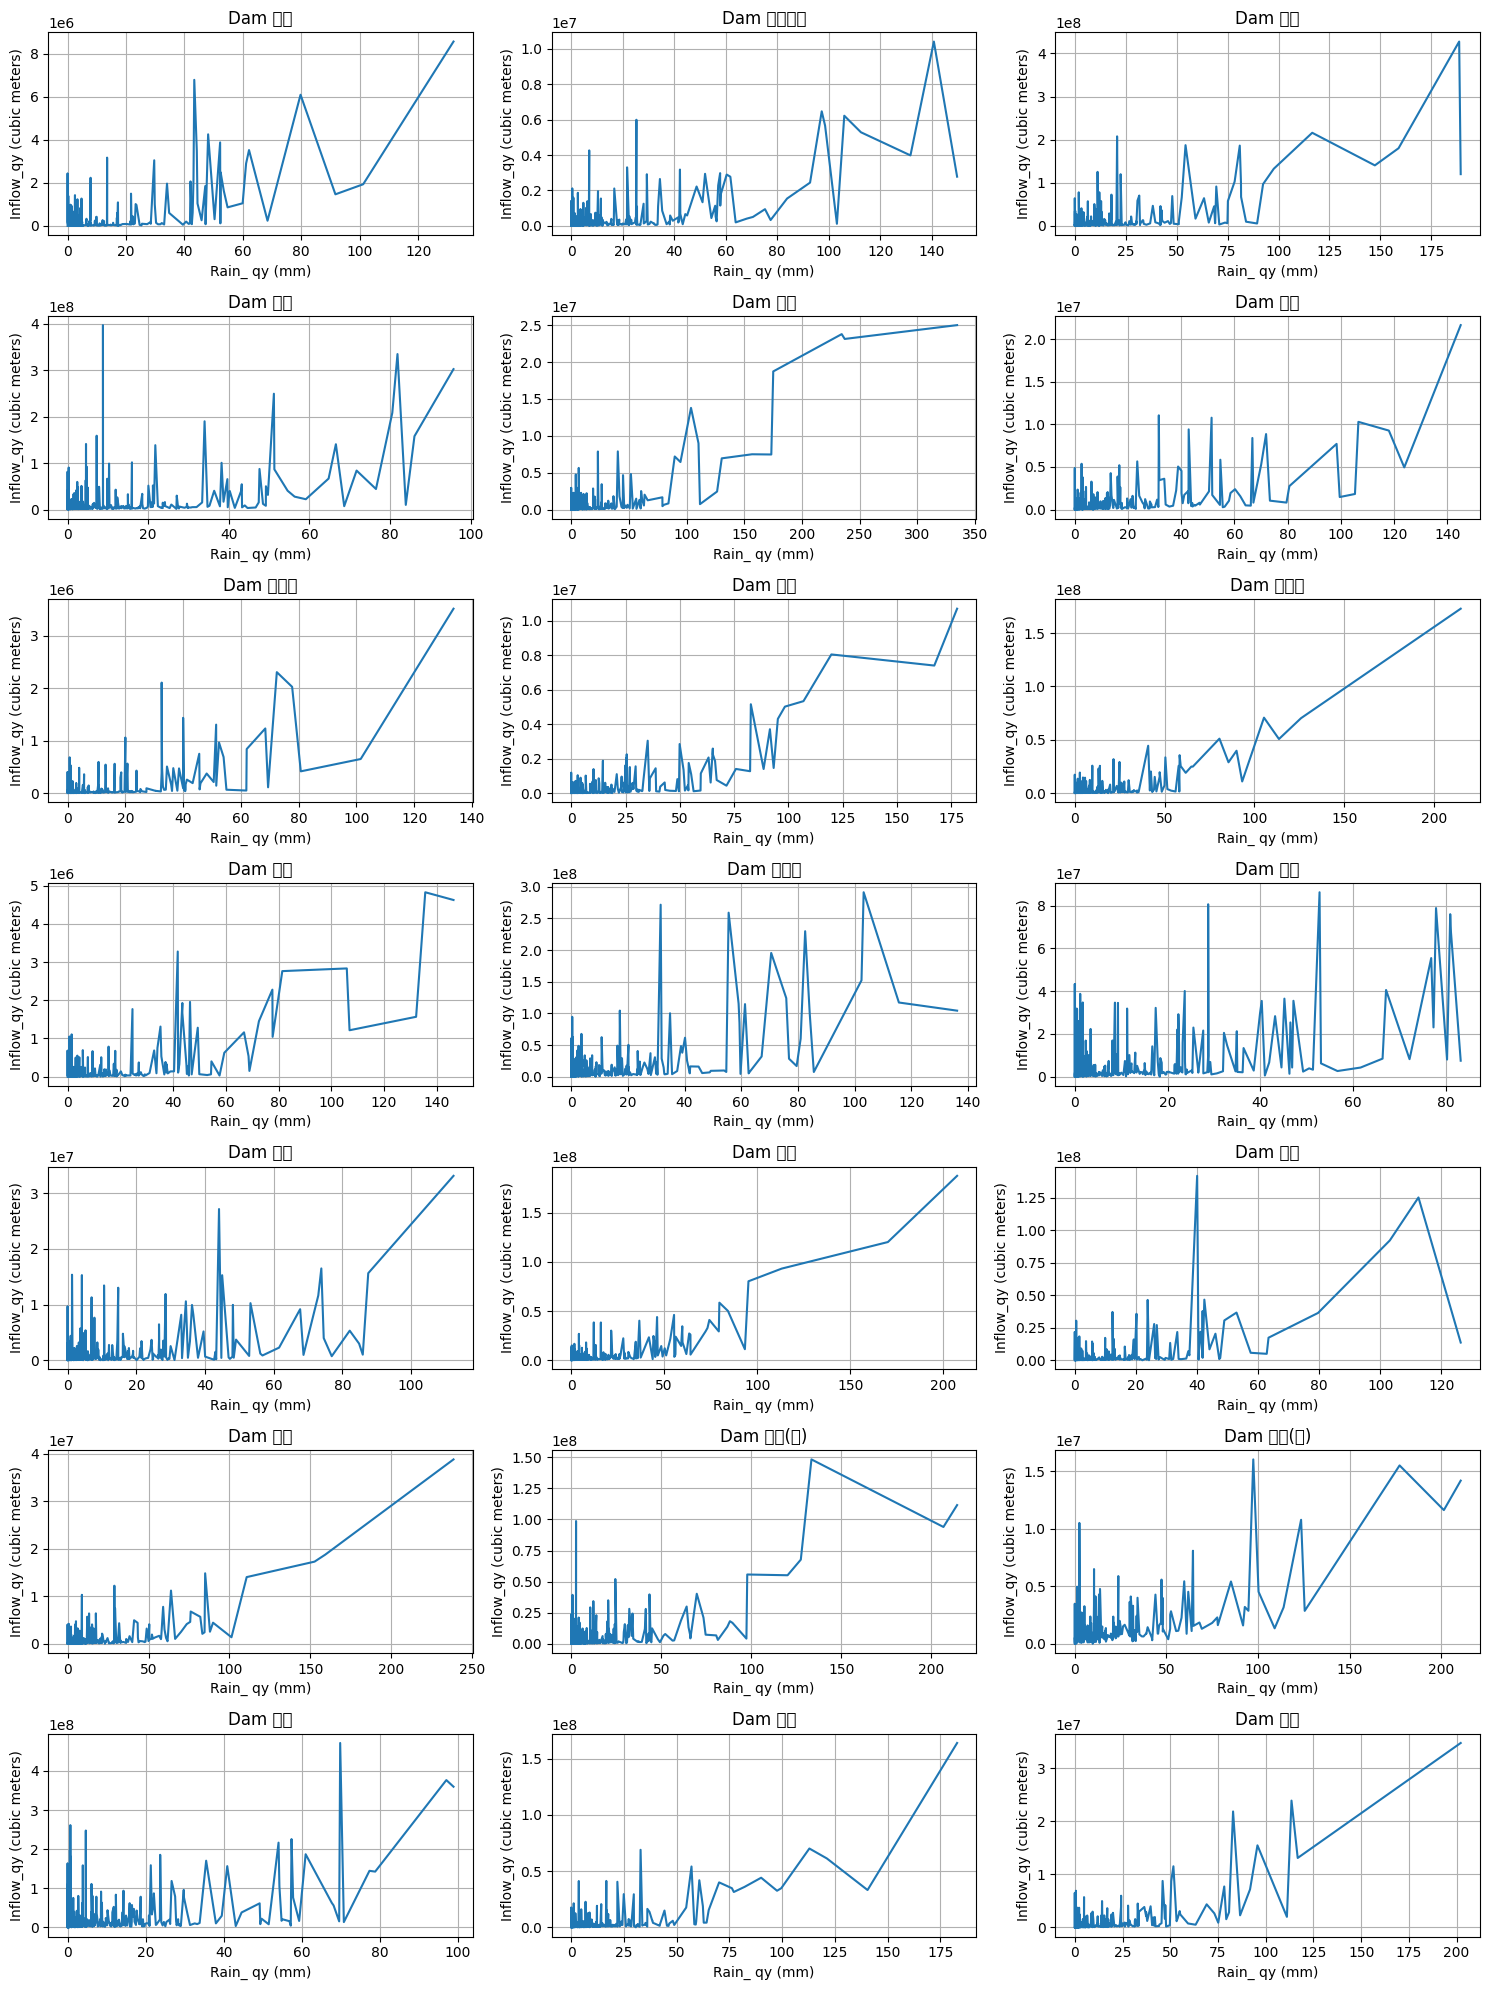

In [21]:
#21개 댐에 대한 강우량과 댐별 유입량 자료의 관계를 시각화하기 위해 산점도를 사용 >> 각 댐의 해당 강우량 자료에 대한 유입량 자료를 표시
#각 산점도는 하나의 댐을 나타낼 것이며, 부분도를 사용하여 격자 형태로 배열하여 모든 댐을 함께 시각화할 수 있음

# 각 댐에 대해 산점도 격자를 만들어 7x3 격자(7행과 3열)로 배열
plt.figure(figsize=(15, 20))

# dam_nm 리스트 얻기
dam_nms = df['dam_nm'].unique()

# 각 댐의 강우량 대비 유입량 시각화
for i, dam_nm in enumerate(dam_nms):
    plt.subplot(7, 3, i+1)
    dam_data = df[df['dam_nm'] == dam_nm]
    # Sort the data by 'rainfall' to get a straight-line plot
    dam_data = dam_data.sort_values(by='rain_qy')
    plt.plot(dam_data['rain_qy'], dam_data['inflow_qy'], linestyle='-')
    plt.xlabel('Rain_ qy (mm)')
    plt.ylabel('Inflow_qy (cubic meters)')
    plt.title(f'Dam {dam_nm}')
    plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-22-8855b5a32ffd>:20: UserWarning: Glyph 

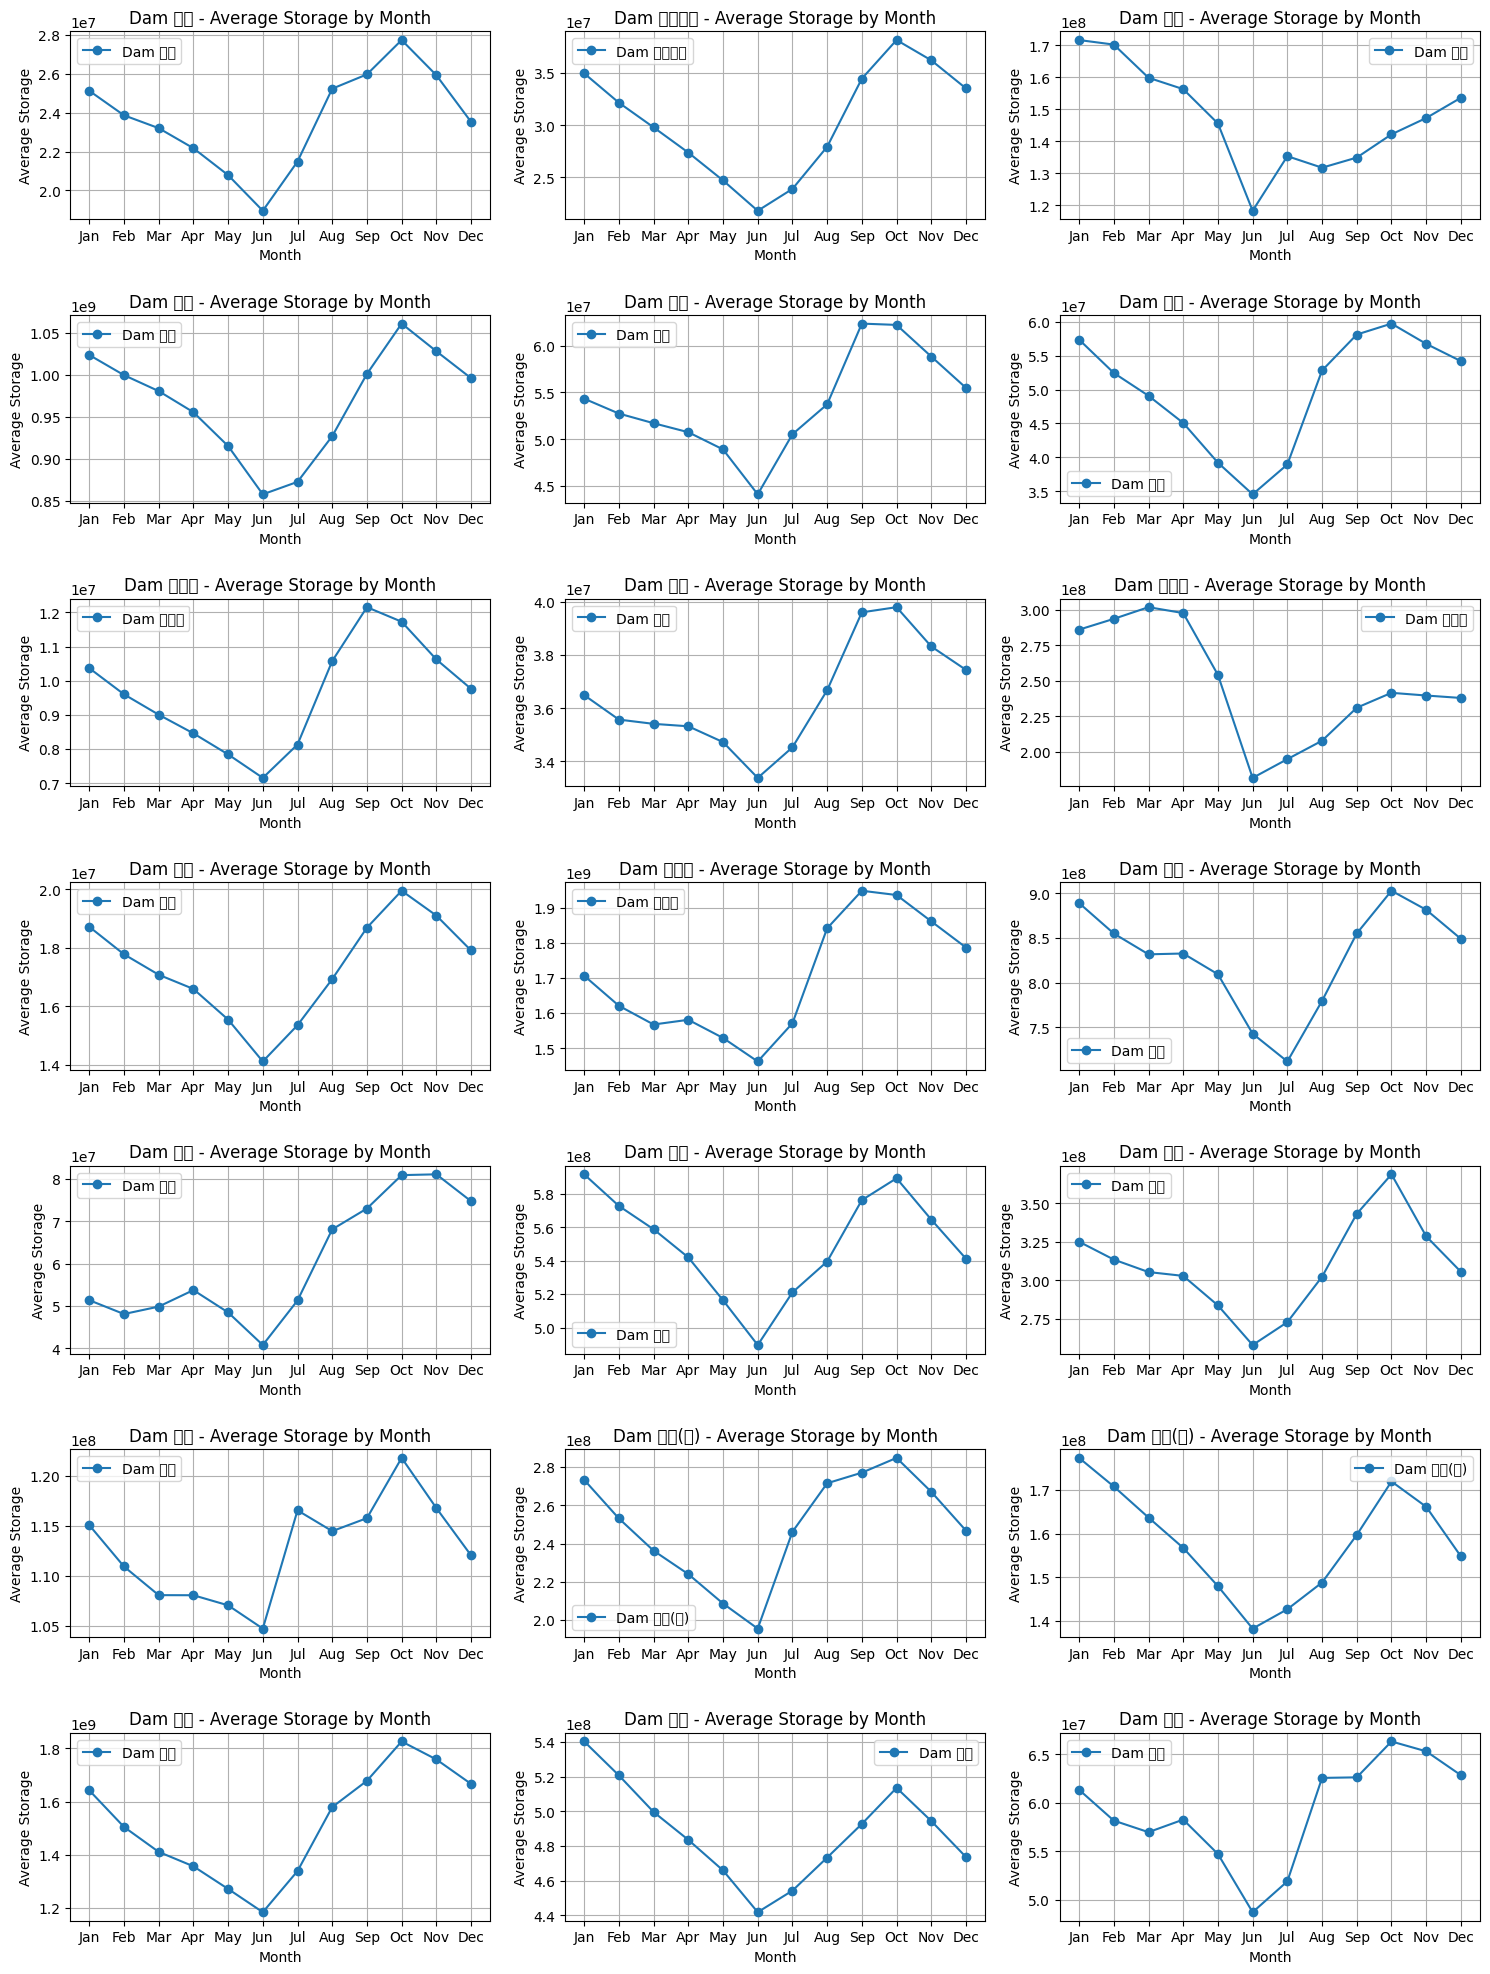

In [22]:
#댐별 월별 평균 저수량 추이

plt.figure(figsize=(15, 20))
dam_nms = df['dam_nm'].unique()

for i, dam_nm in enumerate(dam_nms):
    plt.subplot(7, 3, i+1)
    dam_data = df[df['dam_nm'] == dam_nm]
    avg_reserve_by_month = dam_data.groupby('month')['reserve_qy'].mean()
    months = avg_reserve_by_month.index
    avg_reserve = avg_reserve_by_month.values
    plt.plot(months, avg_reserve, marker='o', label=f'Dam {dam_nm}')
    plt.xlabel('Month')
    plt.ylabel('Average Storage')
    plt.title(f'Dam {dam_nm} - Average Storage by Month')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

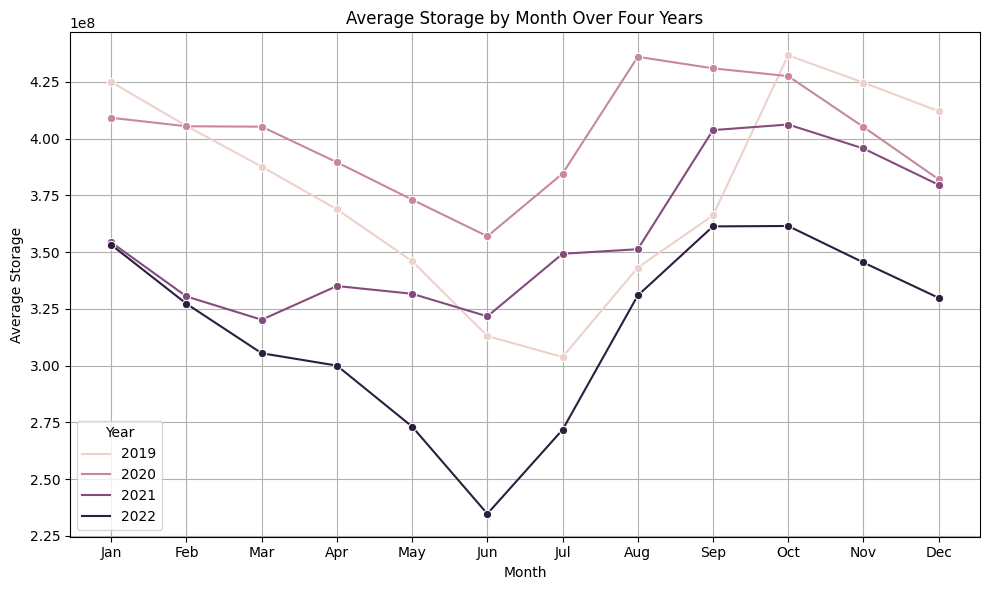

In [23]:
# 모든 댐들의 월별 평균 저수량 계산
avg_storage_by_month = df.groupby(['year', 'month'])['reserve_qy'].mean().reset_index()

# 월병 평균 저수량 plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_storage_by_month, x='month', y='reserve_qy', hue='year', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Storage')
plt.title('Average Storage by Month Over Four Years')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

In [24]:
features = df[['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']]

<Figure size 1200x800 with 0 Axes>

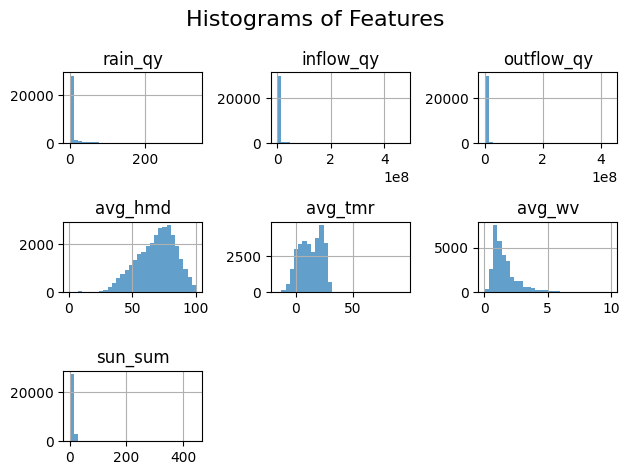

In [25]:
# 각 변수들의 히스토그램
plt.figure(figsize=(12, 8))
features.hist(bins=30, alpha=0.7)
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

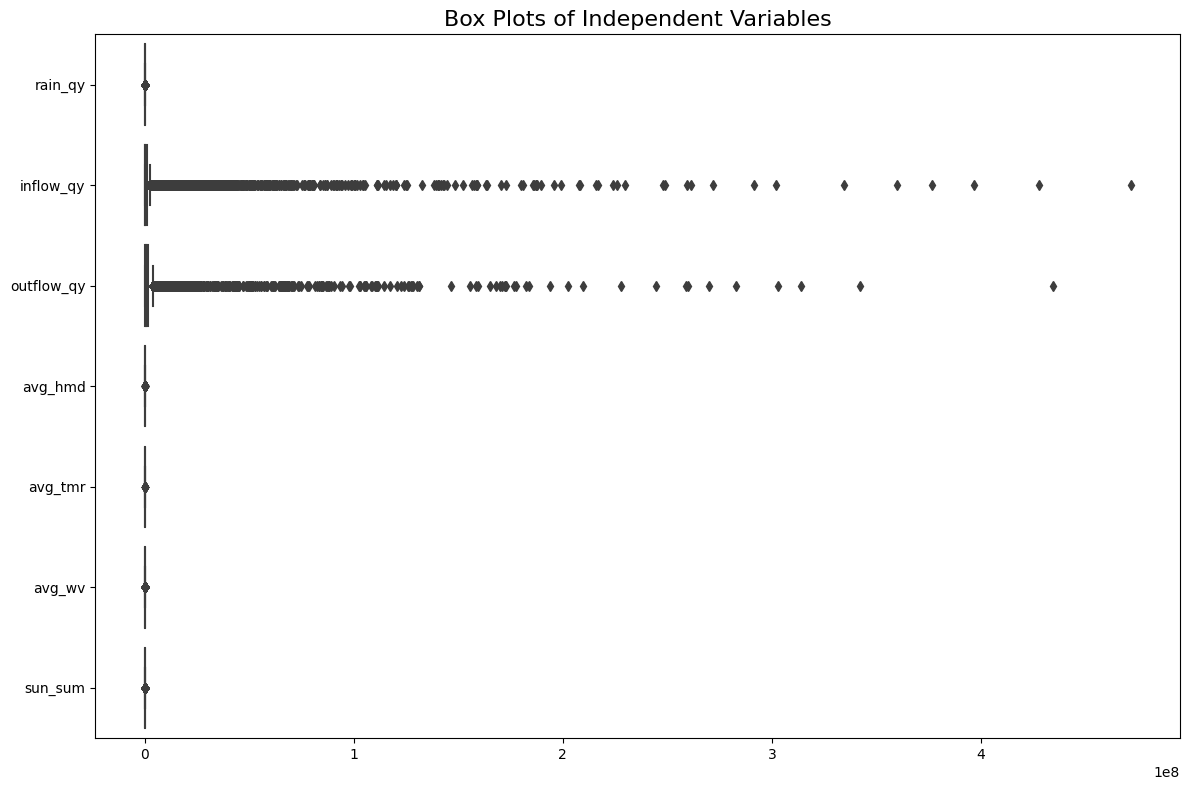

In [26]:
# 각 변수들의 Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=features, orient='h')
plt.title('Box Plots of Independent Variables', fontsize=16)
plt.tight_layout()
plt.show()


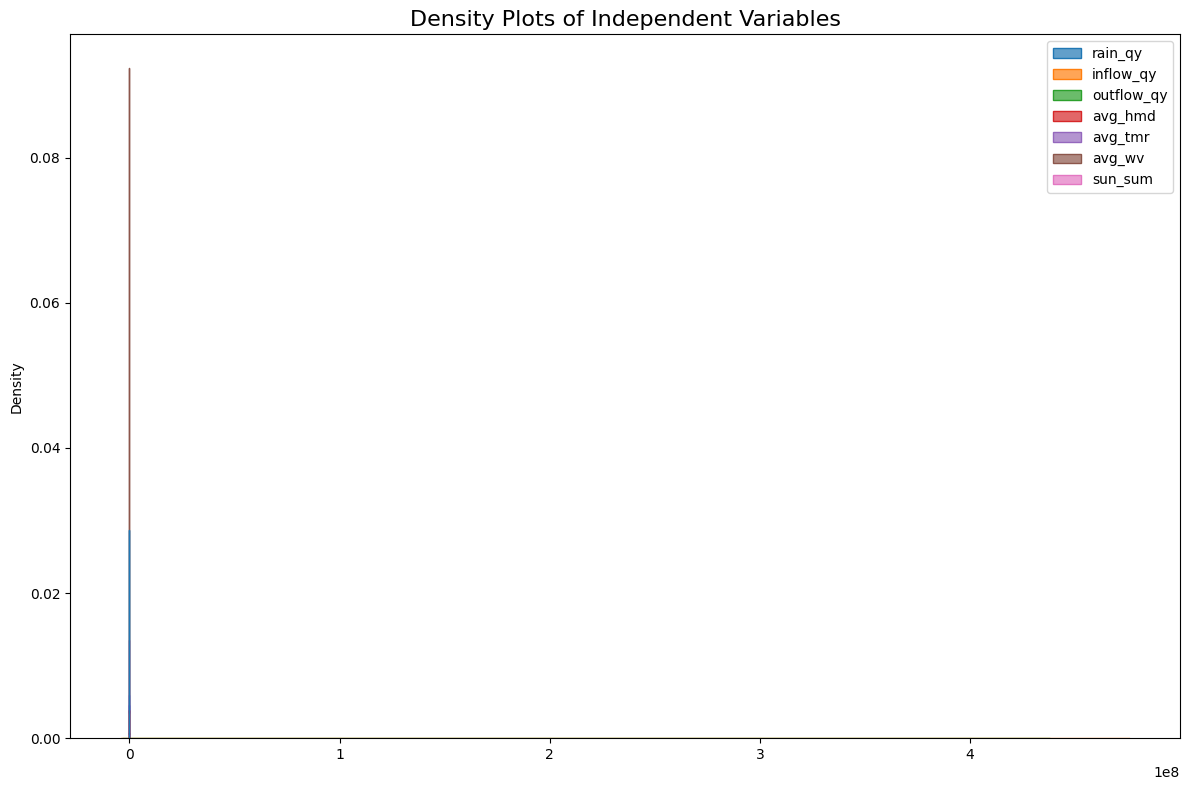

In [27]:
# 각 변수들의 밀도 그래프
plt.figure(figsize=(12, 8))
sns.kdeplot(data=features, fill=True, alpha=0.7)
plt.title('Density Plots of Independent Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [122]:
##이상치 제거

def get_outlier(df = None, dam_name = None, year = None, month = None, column = None, weight = 1.5):
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    df_col = df[column]
    quantile_25 = np.percentile(df_col.values, 25)
    quantile_75 = np.percentile(df_col.values, 75)

    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    # 최대값 보다 크거나, 최소값 보다 작은 값을 이상치로 설정하고 DataFrame index 반환
    outlier_index = df_col[(df_col < lowest_val) | (df_col > highest_val)].index

    # 이상치 정보를 저장할 dictionary 생성
    outlier_info = {
        'dam_nm': dam_name,
        'obsr_de': f'{year}년 {month}월',
        'column': column,
        'outlier_idx': outlier_index
    }

    return outlier_info

In [123]:
# 댐 이름, 월, 컬럼명을 저장할 리스트 생성
outlier_info_list = []

cols = ['avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']
grouped = df.groupby(['dam_nm', df['obsr_de'].dt.year, df['obsr_de'].dt.month])  # 댐별로 + 연도별 + 월별로

for col in cols:
  for (dam, year, month), group_data in grouped:
    outlier_info = get_outlier(group_data, dam_name=dam, year=year, month=month, column=col, weight=1.5)
    if len(outlier_info['outlier_idx']) > 0:
      outlier_info_list.append(outlier_info)

# 이상치 정보 출력
for outlier_info in outlier_info_list:
  dam_name = outlier_info['dam_nm']
  obsr_de = outlier_info['obsr_de']
  col = outlier_info['column']
  outlier_idx = outlier_info['outlier_idx']
  print('댐: {}, 월: {}, 컬럼: {}, 이상치 데이터 인덱스: {}'.format(dam_name, obsr_de, col, outlier_idx))
  print()

  # 이상치가 포함된 행 삭제
  df2 = df.drop(outlier_idx, inplace = True)

댐: 군위, 월: 2019년 1월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([11, 12], dtype='int64')

댐: 군위, 월: 2019년 5월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([137], dtype='int64')

댐: 군위, 월: 2019년 6월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([157, 179], dtype='int64')

댐: 군위, 월: 2019년 8월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([238, 239], dtype='int64')

댐: 군위, 월: 2020년 4월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([472, 474], dtype='int64')

댐: 군위, 월: 2020년 8월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([584, 585, 587], dtype='int64')

댐: 군위, 월: 2020년 9월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([611, 614, 620, 625], dtype='int64')

댐: 군위, 월: 2021년 1월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([752, 756], dtype='int64')

댐: 군위, 월: 2021년 2월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([762, 786], dtype='int64')

댐: 군위, 월: 2021년 4월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([823, 824, 832], dtype='int64')

댐: 군위, 월: 2021년 7월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64Index([917, 918], dtype='int64')

댐: 군위, 월: 2021년 10월, 컬럼: avg_hmd, 이상치 데이터 인덱스: Int64

KeyError: ignored

# **2. 데이터 스케일링**

- train/test split 후 진행해야 함
- EDA -> train/test split -> 스케일링 진행

In [71]:
#train/test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum', 'valid_qy']]
y = df['reserve_qy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2-1. 표준화(StandardScaler)**

- 데이터가 X_train, y_train, X_test, y_test로 분할되었다고 가정

In [72]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_X_train = std.fit_transform(X_train)
std_X_test = std.transform(X_test)

In [73]:
# 학습용 데이터

std_X_train = pd.DataFrame(std_X_train, columns = X_train.columns)
std_X_train

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,-0.284157,-0.193048,-0.252972,0.587559,0.495961,-0.987889,0.475567,-0.790843
1,-0.284157,-0.193048,-0.253529,0.260203,-0.185506,-0.579745,-0.024207,-0.790843
2,0.195859,-0.184002,-0.118019,0.705407,0.736479,-0.069565,-0.762866,0.233623
3,-0.284157,-0.191913,-0.249600,-0.276660,-1.047362,-0.273637,-0.291382,-0.777766
4,-0.284157,-0.009125,-0.216800,1.248817,1.327752,-0.579745,1.163934,-0.501486
...,...,...,...,...,...,...,...,...
24539,3.419965,0.610565,0.556583,1.811868,1.117299,-0.885853,-0.805300,-0.685924
24540,-0.284157,0.170851,0.067624,0.175091,1.017083,-0.477709,-0.275666,0.668263
24541,1.023172,-0.190221,-0.248899,-0.139170,0.065033,-0.273637,-1.297216,-0.748853
24542,-0.284157,0.186173,0.381209,-0.165359,-0.375916,1.052831,-0.401395,2.765873


In [74]:
# 평가용 데이터

std_X_test = pd.DataFrame(std_X_test, columns = X_test.columns)
std_X_test

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,-0.284157,-0.110237,-0.179206,1.072045,0.997040,-0.477709,-0.527124,-0.427786
1,-0.284157,-0.161825,-0.181381,-1.029577,-1.227751,0.848759,0.022941,-0.427786
2,-0.284157,0.132805,1.841010,0.790519,1.197472,-0.171601,-0.071356,2.765873
3,-0.284157,-0.190006,-0.249755,-0.119529,-0.205550,-0.069565,0.352981,-0.757356
4,-0.284157,-0.193048,-0.242207,-1.939625,-2.029477,3.093552,0.038657,-0.748853
...,...,...,...,...,...,...,...,...
6132,-0.284157,-0.193048,-0.065782,-0.944465,-1.177643,-0.987889,-0.401395,1.065108
6133,-0.284157,-0.191944,-0.249384,0.980385,-1.097470,-0.885853,-0.527124,-0.757356
6134,-0.284157,-0.192524,-0.252054,-1.448592,-1.267837,0.746723,-0.275666,-0.790843
6135,-0.284157,1.315307,0.517812,0.685765,-1.458247,-0.987889,-0.307098,2.556112


In [33]:
features = std_X_train[['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']]

<Figure size 1200x800 with 0 Axes>

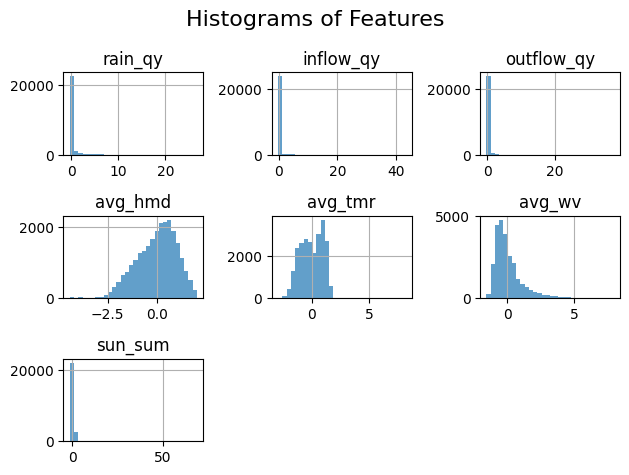

In [34]:
plt.figure(figsize=(12, 8))
features.hist(bins=30, alpha=0.7)
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

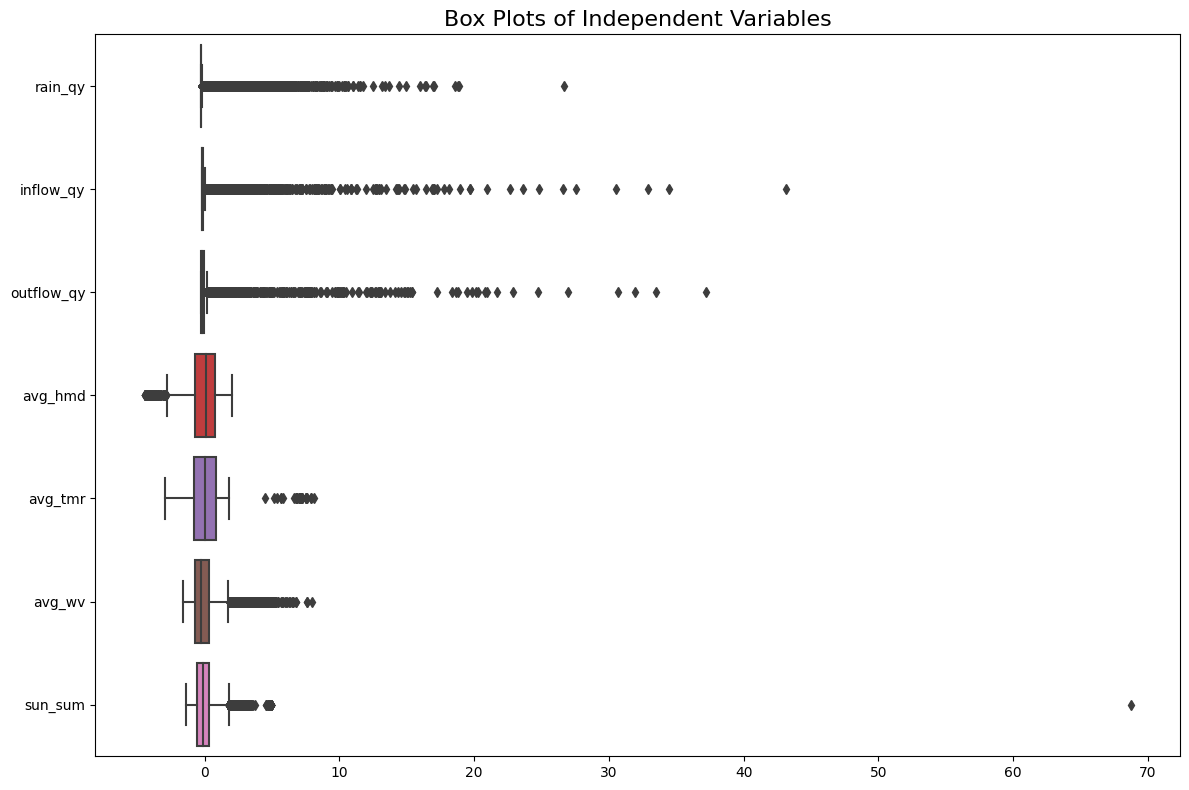

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=features, orient='h')
plt.title('Box Plots of Independent Variables', fontsize=16)
plt.tight_layout()
plt.show()

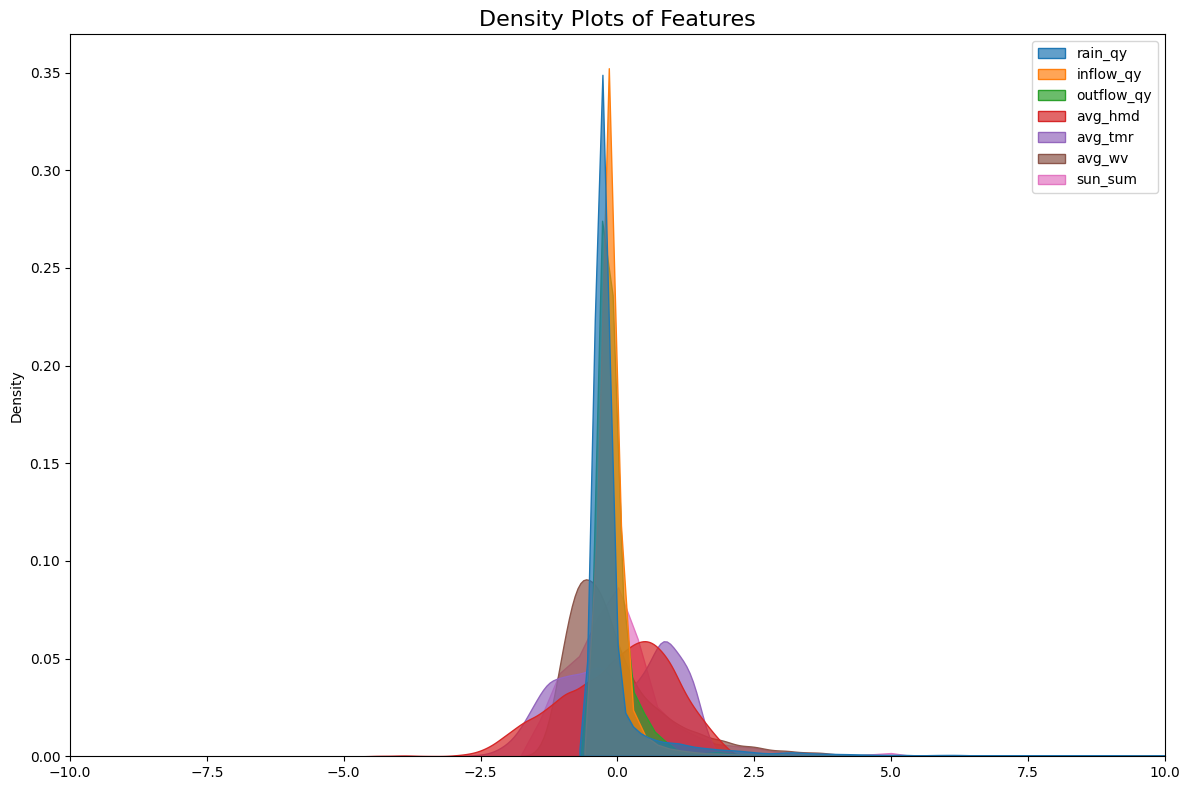

In [36]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=features, fill=True, alpha=0.7)
plt.xlim(-10, 10)
plt.title('Density Plots of Features', fontsize=16)
plt.tight_layout()
plt.show()

## +Feature Engineering

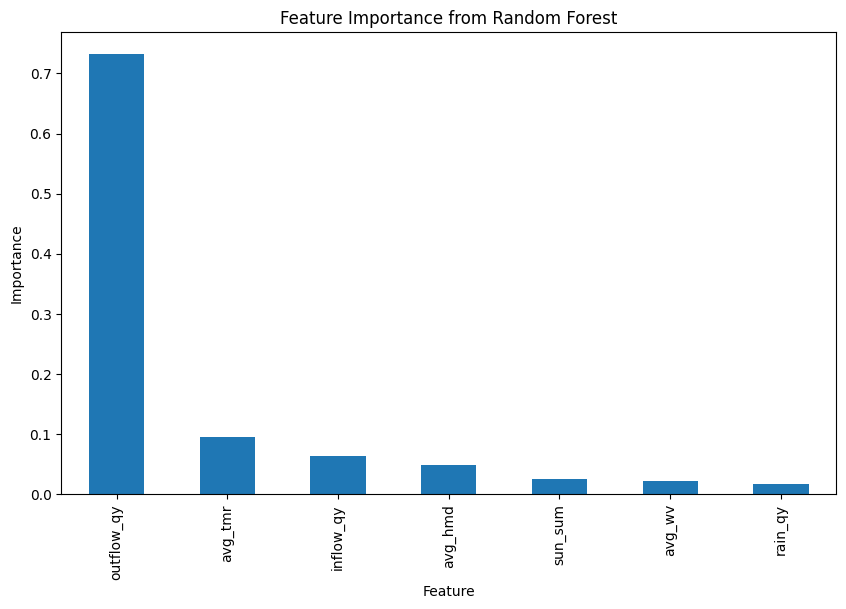

In [37]:
from sklearn.ensemble import RandomForestRegressor

selected_features = ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# print(len(features.columns))
# print(len(rf_model.feature_importances_))
# print(features.columns)
# print(rf_model.feature_importances_)

# Get the feature importances from the model
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)

# Sort the feature importances in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

### **2-2. 정규화(MinMaxScaler)**

In [38]:
from sklearn.preprocessing import MinMaxScaler

mms = StandardScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

In [39]:
# 학습용 데이터

pd.DataFrame(mms_X_train, columns = X_train.columns)

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,-0.284157,-0.193048,-0.252972,0.587559,0.495961,-0.987889,0.475567,-0.790843
1,-0.284157,-0.193048,-0.253529,0.260203,-0.185506,-0.579745,-0.024207,-0.790843
2,0.195859,-0.184002,-0.118019,0.705407,0.736479,-0.069565,-0.762866,0.233623
3,-0.284157,-0.191913,-0.249600,-0.276660,-1.047362,-0.273637,-0.291382,-0.777766
4,-0.284157,-0.009125,-0.216800,1.248817,1.327752,-0.579745,1.163934,-0.501486
...,...,...,...,...,...,...,...,...
24539,3.419965,0.610565,0.556583,1.811868,1.117299,-0.885853,-0.805300,-0.685924
24540,-0.284157,0.170851,0.067624,0.175091,1.017083,-0.477709,-0.275666,0.668263
24541,1.023172,-0.190221,-0.248899,-0.139170,0.065033,-0.273637,-1.297216,-0.748853
24542,-0.284157,0.186173,0.381209,-0.165359,-0.375916,1.052831,-0.401395,2.765873


In [40]:
# 평가용 데이터

pd.DataFrame(mms_X_test, columns = X_test.columns)

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,-0.284157,-0.110237,-0.179206,1.072045,0.997040,-0.477709,-0.527124,-0.427786
1,-0.284157,-0.161825,-0.181381,-1.029577,-1.227751,0.848759,0.022941,-0.427786
2,-0.284157,0.132805,1.841010,0.790519,1.197472,-0.171601,-0.071356,2.765873
3,-0.284157,-0.190006,-0.249755,-0.119529,-0.205550,-0.069565,0.352981,-0.757356
4,-0.284157,-0.193048,-0.242207,-1.939625,-2.029477,3.093552,0.038657,-0.748853
...,...,...,...,...,...,...,...,...
6132,-0.284157,-0.193048,-0.065782,-0.944465,-1.177643,-0.987889,-0.401395,1.065108
6133,-0.284157,-0.191944,-0.249384,0.980385,-1.097470,-0.885853,-0.527124,-0.757356
6134,-0.284157,-0.192524,-0.252054,-1.448592,-1.267837,0.746723,-0.275666,-0.790843
6135,-0.284157,1.315307,0.517812,0.685765,-1.458247,-0.987889,-0.307098,2.556112


### **2-3. 표준정규화(RobustScaler)**
- 데이터의 중앙값(median)과 IQR(Interquartile Range)을 사용하여 스케일링을 수행
  - 이상치에 영향을 덜 받음

In [41]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
robust_X_train = robust.fit_transform(X_train)
robust_X_test = robust.transform(X_test)

In [42]:
# 학습용 데이터
pd.DataFrame(robust_X_train, columns = X_train.columns)

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,0.000000,-0.231677,-0.374466,0.321101,0.290909,-0.7,0.593698,-0.391922
1,0.000000,-0.231677,-0.377627,0.091743,-0.121212,-0.3,0.066335,-0.391922
2,11.698587,-0.139940,0.391676,0.403670,0.436364,0.2,-0.713101,0.713994
3,0.000000,-0.220159,-0.355324,-0.284404,-0.642424,0.0,-0.215589,-0.377805
4,0.000000,1.633336,-0.169115,0.784404,0.793939,-0.3,1.320066,-0.079559
...,...,...,...,...,...,...,...,...
24539,90.274137,7.917083,4.221448,1.178899,0.666667,-0.6,-0.757877,-0.278662
24540,0.000000,3.458320,1.445589,0.032110,0.606061,-0.2,-0.199005,1.183191
24541,31.861264,-0.203004,-0.351343,-0.188073,0.030303,0.0,-1.276949,-0.346593
24542,0.000000,3.613684,3.225839,-0.206422,-0.236364,1.3,-0.331675,3.447572


In [43]:
# 평가용 데이터
pd.DataFrame(robust_X_test, columns = X_test.columns)

,rain_qy,inflow_qy,outflow_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,valid_qy
0,0.0,0.608046,0.044313,0.660550,0.593939,-0.2,-0.464345,0.000000
1,0.0,0.084931,0.031962,-0.811927,-0.751515,1.1,0.116086,0.000000
2,0.0,3.072527,11.513259,0.463303,0.715152,0.1,0.016584,3.447572
3,0.0,-0.200830,-0.356202,-0.174312,-0.133333,0.2,0.464345,-0.355773
4,0.0,-0.231677,-0.313352,-1.449541,-1.236364,3.3,0.132670,-0.346593
...,...,...,...,...,...,...,...,...
6132,0.0,-0.231677,0.688228,-0.752294,-0.721212,-0.7,-0.331675,1.611587
6133,0.0,-0.220482,-0.354095,0.596330,-0.672727,-0.6,-0.464345,-0.355773
6134,0.0,-0.226361,-0.369256,-1.105505,-0.775758,1.0,-0.199005,-0.391922
6135,0.0,15.063265,4.001346,0.389908,-0.890909,-0.7,-0.232172,3.221134


# **3. 회귀 모델링**

In [44]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

## **모델별 성능 시각화를 위한 함수**

### XGBoost, LightGBM 모델링

In [75]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# RMSE(루트 평균 제곱 오차) 계산을 위한 함수
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Adjusted R-Square 계산을 위한 함수
def adj_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adj_r2

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 하이퍼 파라미터 튜닝을 위한 매개 변수 Grid 정의
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

std_X_train.reset_index(drop=True, inplace=True)
y_train_series = pd.Series(y_train)
y_train_series.reset_index(drop=True, inplace=True)

# XGBoost용 GridSearchCV 개체 생성
xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=5, shuffle=True, random_state=42))

# 모델을 적합시켜 최상의 하이퍼 파라미터를 찾기
xgb_grid_search.fit(std_X_train, y_train_series)

# 최상의 XGBoost 모델 선택
best_xgb_model = xgb_grid_search.best_estimator_

# 테스트셋에 대한 예측 수행
y_pred_xgb = best_xgb_model.predict(std_X_test)

# XGBoost에 대한 RSME 및 Adjusted R-Square 계산
xgb_rmse = rmse(y_test, y_pred_xgb)
xgb_adj_r2 = adj_r2(y_test, y_pred_xgb, std_X_test.shape[1])

# LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# 하이퍼 파라미터 튜닝을 위한 매개 변수 Grid 정의
lgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_samples': [1, 3, 5],
}

# LightGBM용 GridSearchCV 개체 생성
lgb_grid_search = GridSearchCV(lgb_model, param_grid=lgb_param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=5, shuffle=True, random_state=42))

# 모델을 적합시켜 최상의 하이퍼 파라미터를 찾기
lgb_grid_search.fit(std_X_train,y_train_series)

# 최상의 LightGBM 모델 선택
best_lgb_model = lgb_grid_search.best_estimator_

# 테스트셋에 대한 예측 수행
y_pred_lgb = best_lgb_model.predict(std_X_test)

# LightGBM에 대한 RSME 및 Adjusted R-Square 계산
lgb_rmse = rmse(y_test, y_pred_lgb)
lgb_adj_r2 = adj_r2(y_test, y_pred_lgb, std_X_test.shape[1])

# 두 모델에 대한 RMSE 및 Adjusted R-Square 출력
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost Adjusted R-Square:", xgb_adj_r2)
print("LightGBM RMSE:", lgb_rmse)
print("LightGBM Adjusted R-Square:", lgb_adj_r2)


XGBoost RMSE: 45453413.85750098
XGBoost Adjusted R-Square: 0.991615093880353
LightGBM RMSE: 50678070.530848056
LightGBM Adjusted R-Square: 0.9895766977066267


In [76]:
best_hyperparameters = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
best_model = xgb_grid_search.best_estimator_

# Print the best hyperparameters and best score
print("Best Hyperparameters:")
for param, value in best_hyperparameters.items():
    print(f"{param}: {value}")

print("Best Score:", best_score)

Best Hyperparameters:
learning_rate: 0.1
max_depth: 7
min_child_weight: 1
n_estimators: 500
Best Score: -1972255543762854.0


In [77]:
best_hyperparameters = lgb_grid_search.best_params_
best_score = lgb_grid_search.best_score_
best_model = lgb_grid_search.best_estimator_

# Print the best hyperparameters and best score
print("Best Hyperparameters:")
for param, value in best_hyperparameters.items():
    print(f"{param}: {value}")

print("Best Score:", best_score)

Best Hyperparameters:
learning_rate: 0.1
max_depth: 7
min_child_samples: 5
n_estimators: 500
Best Score: -2626533434985065.5


### 예측 결과 시각화

In [78]:
my_predictions = {} # 빈 딕셔너리

colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [79]:
## 예측값, 실제값을 산점도로 표현
def plot_predictions(name_,pred,actual): # parameter: 모델명, 예측값, 실제값
  df = pd.DataFrame({'prediction' : pred,'actual': y_test})
  df = df.sort_values(by = 'actual').reset_index(drop = True)

  plt.figure(figsize = (10,7))
  plt.scatter(df.index,df['prediction'],marker = 'o',color = 'blue')
  plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'x',color = 'black')
  plt.title(name_,fontsize = 15)
  plt.legend(['prediction','actual'],fontsize = 12)
  plt.show()

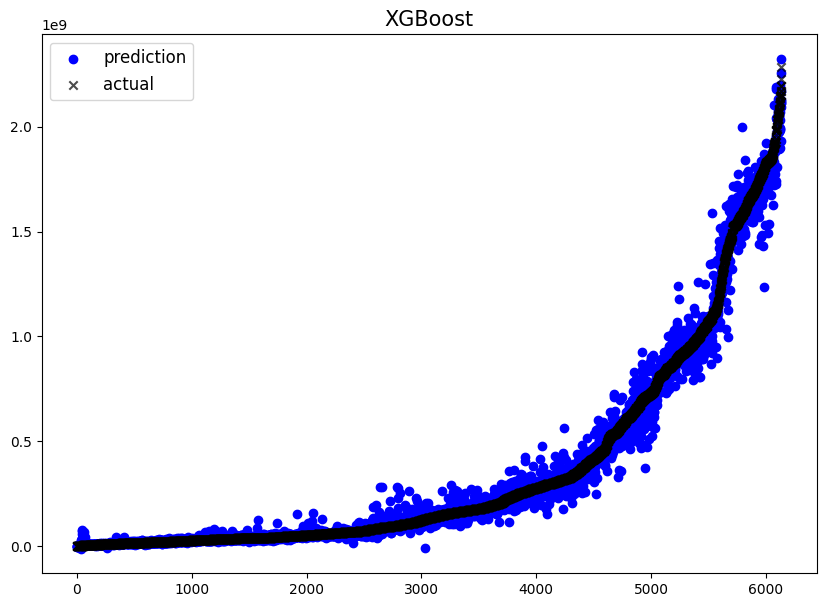

In [80]:
plot_predictions('XGBoost',y_pred_xgb, y_test)

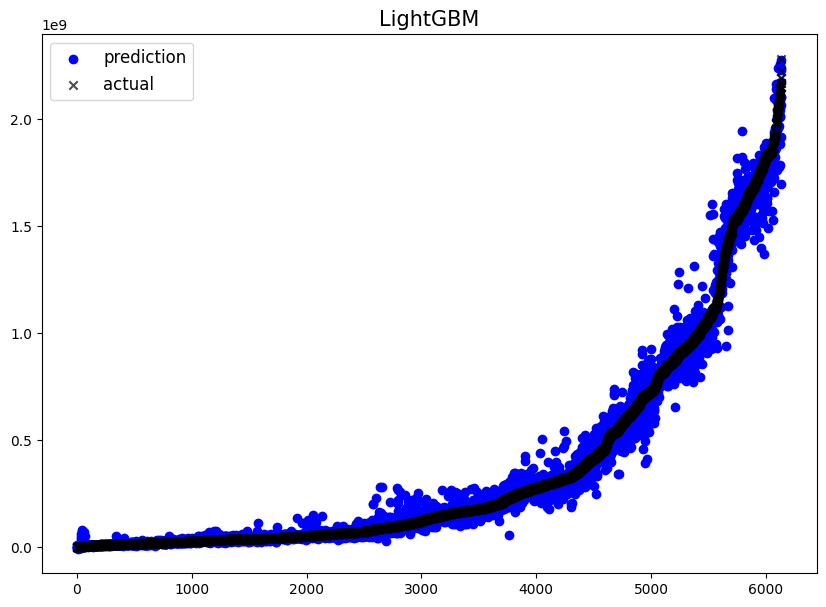

In [81]:
plot_predictions('LightGBM',y_pred_lgb, y_test)

In [82]:
## 평가 지표 시각화
def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmse = np.sqrt(mean_squared_error(pred, actual))

    n = len(actual) # 데이터 개수
    p = X_train.shape[1]  # 변수의 개수
    r2 = r2_score(actual, pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    my_predictions[name_] = {'rmse': rmse, 'Adjusted R_2': adjusted_r2}

    # RMSE 기준으로 내림차순 정렬
    df = pd.DataFrame(my_predictions).T
    df = df[['rmse', 'Adjusted R_2']]  # 열 순서 변경
    df = df.sort_values(by='rmse', ascending=False)
    print()

    # 상한, 하한 설정
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10

    length = len(df)

    plt.figure(figsize=(8, length))
    ax = plt.subplot()  # subplot 객체
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df.index, fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])

    for i, v in enumerate(df['rmse']):  # 인덱스, value
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print("\nRMSE and Adjusted R-Squared")
    print(df)

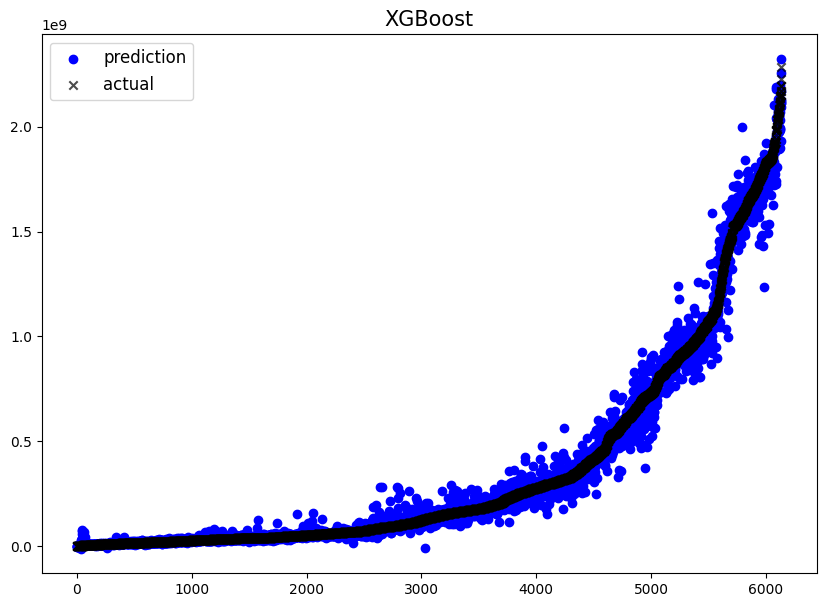

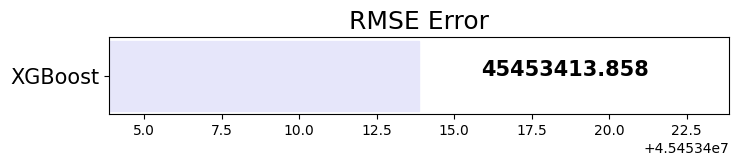



RMSE and Adjusted R-Squared
                 rmse  Adjusted R_2
XGBoost  4.545341e+07      0.991615


In [83]:
model_eval('XGBoost', y_pred_xgb, y_test)

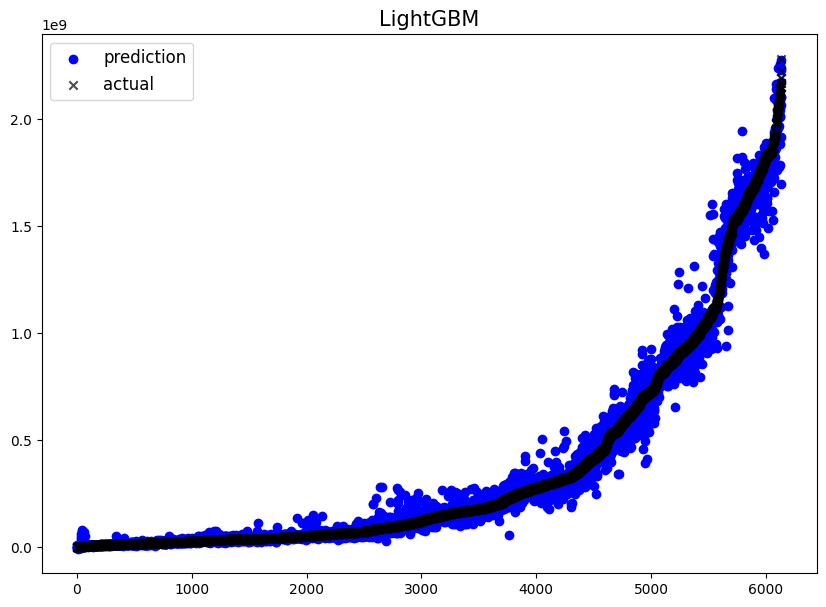

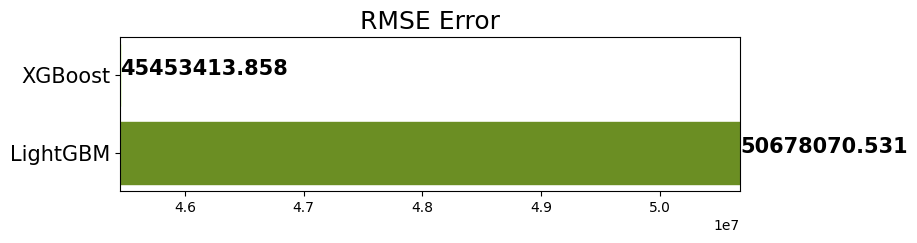



RMSE and Adjusted R-Squared
                  rmse  Adjusted R_2
LightGBM  5.067807e+07      0.989577
XGBoost   4.545341e+07      0.991615


In [84]:
model_eval('LightGBM', y_pred_lgb, y_test)

### **예시 모델링**

In [49]:
### 데이터 생성

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=0)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

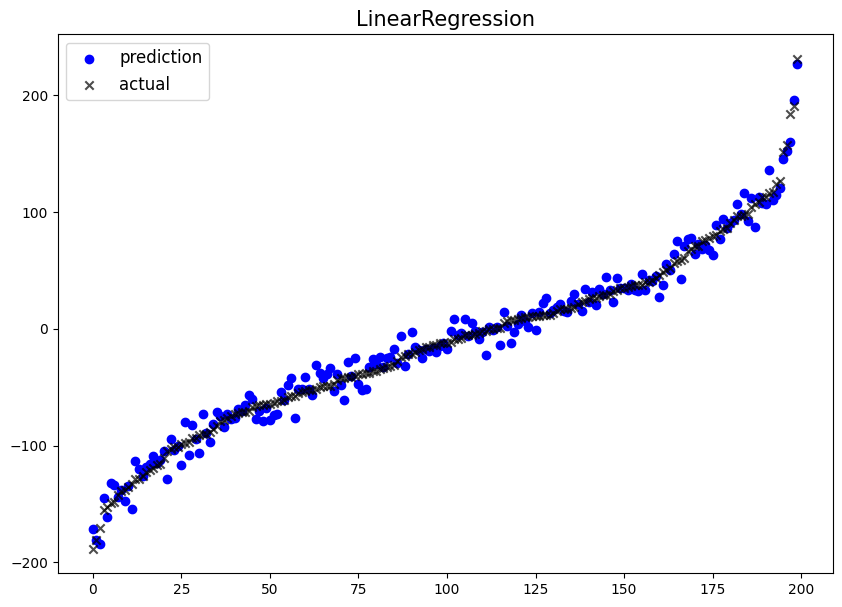

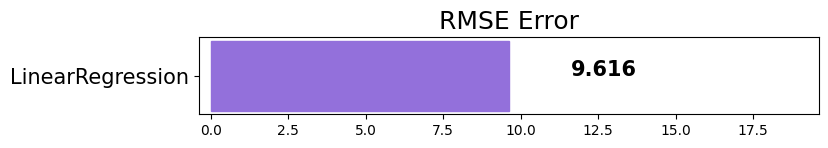



RMSE and Adjusted R-Squared
                     rmse  Adjusted R_2
LinearRegression  9.61558      0.983784


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 초기화
model = LinearRegression(n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
model_eval('LinearRegression',pred,y_test) # 모델, pred, actual